Import necessary modules into project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.cluster import KMeans

Read in Iris dataset.

Removing Id column as it is just a running number and does not add any value to our analysis.

In [2]:
df = pd.read_csv('iris.csv')
df.drop(['Id'], axis=1, inplace=True)

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Display the statistical summary of the dataset.

In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Display the statistical summary by 'Species'.

In [4]:
df[df['Species']=='Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [5]:
df[df['Species']=='Iris-versicolor'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [6]:
df[df['Species']=='Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Display the distribution for each flower-attribute in our dataset.

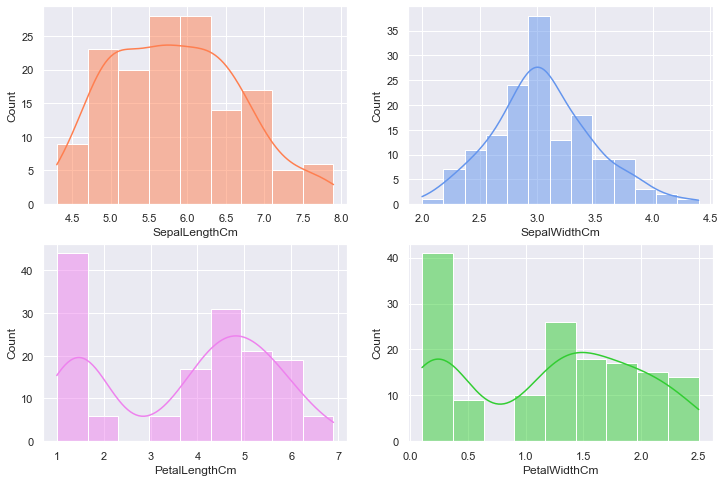

In [7]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sb.histplot(data=df['SepalLengthCm'], color='coral', kde=True, ax=ax[0,0])
sb.histplot(data=df['SepalWidthCm'], color='cornflowerblue', kde=True, ax=ax[0,1])
sb.histplot(data=df['PetalLengthCm'], color='violet', kde=True, ax=ax[1,0])
sb.histplot(data=df['PetalWidthCm'], color='limegreen', kde=True, ax=ax[1,1])

plt.show()

Display the KDE plots for each flower-attribute by Species.

A Kernel Density Estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. A KDE plot represents the data using a continuous probability density curve.

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

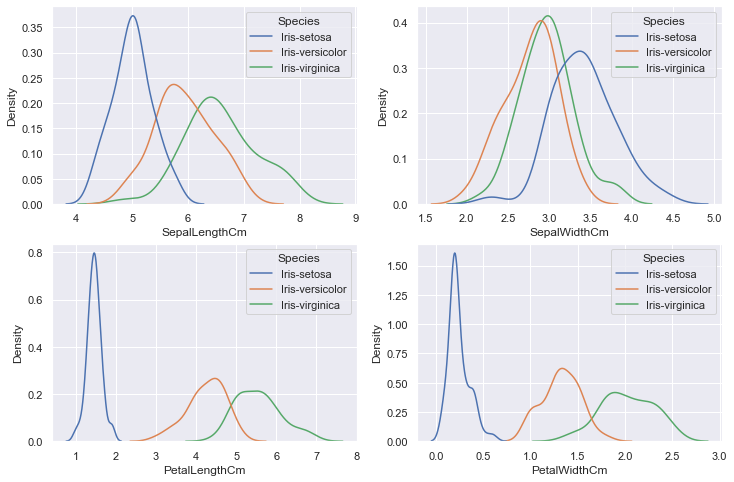

In [8]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sb.kdeplot(data=df, x='SepalLengthCm', hue='Species', ax=ax[0,0])
sb.kdeplot(data=df, x='SepalWidthCm', hue='Species', ax=ax[0,1])
sb.kdeplot(data=df, x='PetalLengthCm', hue='Species', ax=ax[1,0])
sb.kdeplot(data=df, x='PetalWidthCm', hue='Species', ax=ax[1,1])

Use K-Means to cluster the data into 3 clusters.

Print out the cluster-assignment for each row.

In [9]:
df_nolabels = df.drop(['Species'], axis=1)
X = df_nolabels.values  # convert to numpy array

# apply kmeans to the dataset
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X)

# print out the cluster-assignment for each row
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [11]:
df_nolabels

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Plot out the clustering-results generated by K-Means.

In [10]:
np.unique(clusters)

array([0, 1, 2])

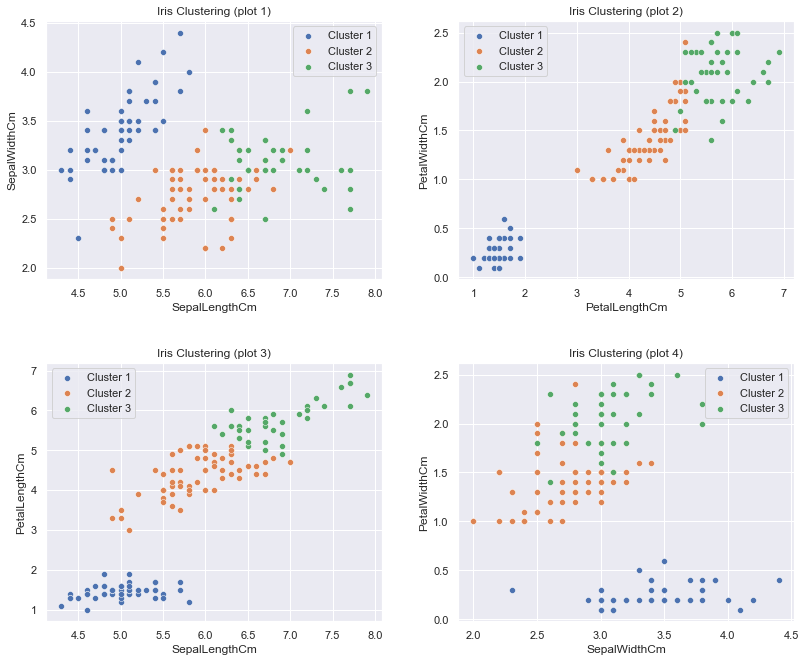

In [31]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for i in np.unique(clusters):
    bool_arr = (clusters == i)
    
    sb.scatterplot(x=X[bool_arr,0], y=X[bool_arr,1],
        label='Cluster ' + str(i+1), ax=ax[0,0])
    sb.scatterplot(x=X[bool_arr,2], y=X[bool_arr,3],
        label='Cluster ' + str(i+1), ax=ax[0,1])
    sb.scatterplot(x=X[bool_arr,0], y=X[bool_arr,2],
        label='Cluster ' + str(i+1), ax=ax[1,0])
    sb.scatterplot(x=X[bool_arr,1], y=X[bool_arr,3],
        label='Cluster ' + str(i+1), ax=ax[1,1])

ax[0,0].set_xlabel('SepalLengthCm')
ax[0,0].set_ylabel('SepalWidthCm')
ax[0,0].set_title('Iris Clustering (plot 1)')

ax[0,1].set_xlabel('PetalLengthCm')
ax[0,1].set_ylabel('PetalWidthCm')
ax[0,1].set_title('Iris Clustering (plot 2)')

ax[1,0].set_xlabel('SepalLengthCm')
ax[1,0].set_ylabel('PetalLengthCm')
ax[1,0].set_title('Iris Clustering (plot 3)')

ax[1,1].set_xlabel('SepalWidthCm')
ax[1,1].set_ylabel('PetalWidthCm')
ax[1,1].set_title('Iris Clustering (plot 4)')

# sb.color_palette('pastel')
plt.tight_layout(pad=3)
plt.show()


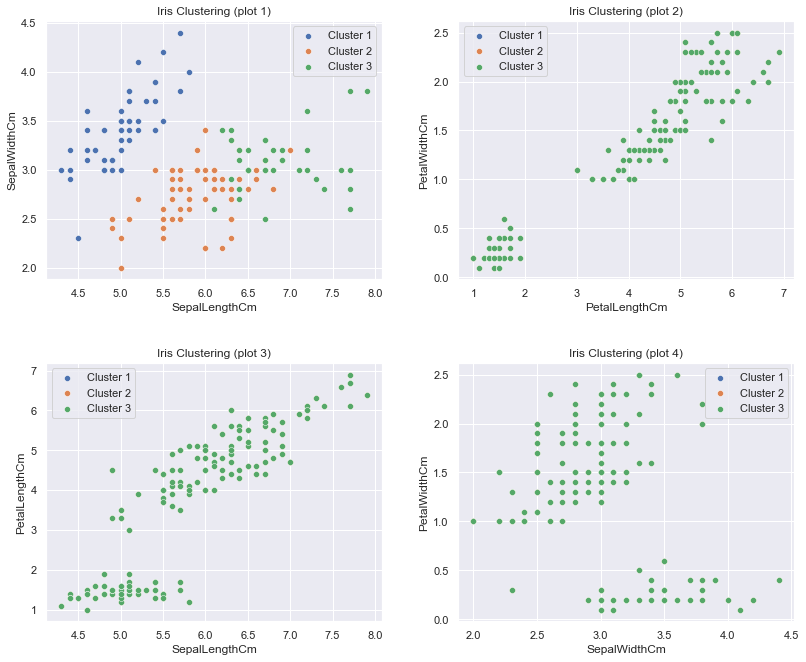

In [19]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for i in np.unique(clusters):
    bool_arr = (clusters == i) # this will run 3 times as the clusters have 3 sets
    
    # scatter plot will each be plotted 3 times, where every loop only has a some true values
    # every loop runs with a different set of true and false values
    # only true points will be printed on screen, false will not be printed

    sb.scatterplot(x=X[bool_arr,0], y=X[bool_arr,1],
        label='Cluster ' + str(i+1), ax=ax[0,0])
    sb.scatterplot(x=X[:,2], y=X[:,3],
        label='Cluster ' + str(i+1), ax=ax[0,1])
    sb.scatterplot(x=X[:,0], y=X[:,2],
        label='Cluster ' + str(i+1), ax=ax[1,0])
    sb.scatterplot(x=X[:,1], y=X[:,3],
        label='Cluster ' + str(i+1), ax=ax[1,1])

ax[0,0].set_xlabel('SepalLengthCm')
ax[0,0].set_ylabel('SepalWidthCm')
ax[0,0].set_title('Iris Clustering (plot 1)')

ax[0,1].set_xlabel('PetalLengthCm')
ax[0,1].set_ylabel('PetalWidthCm')
ax[0,1].set_title('Iris Clustering (plot 2)')

ax[1,0].set_xlabel('SepalLengthCm')
ax[1,0].set_ylabel('PetalLengthCm')
ax[1,0].set_title('Iris Clustering (plot 3)')

ax[1,1].set_xlabel('SepalWidthCm')
ax[1,1].set_ylabel('PetalWidthCm')
ax[1,1].set_title('Iris Clustering (plot 4)')

# sb.color_palette('pastel')
plt.tight_layout(pad=3)
plt.show()


Find the optimal number of clusters using Within-Cluster Sum of Squares (WCSS) via the Elbow method.

The elbow seems to occur at N = 3.

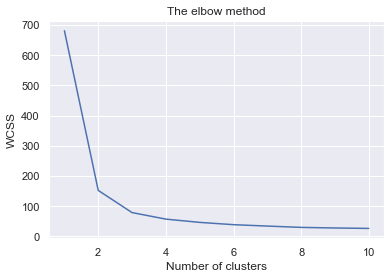

In [114]:
sb.set(style='darkgrid')
wcss = []

# trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X=X)
    wcss.append(kmeans.inertia_)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares

plt.plot(range(1,11), wcss)
plt.show()    